# 12. Which cities are the worst with regard to access to train facilities? You can do this by calculating the travel distance, travel time, … Would you recommend based on this, and the visualization in Q5, to create some new routes?

In [61]:
import src.data_processing.data as data

In [40]:
facilities = data.facilities

The top 10 stations regarding the number of facilities they own

In [41]:
facilities['count'] = facilities.loc[:,['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].sum(axis=1)
facilities[["name" , "count"]].sort_values(by = "count", ascending = False).head(10)

,name,count
25,antwerpen-centraal,17.0
118,brussel-zuid/bruxelles-midi,16.0
247,gent-sint-pieters,15.0
109,brugge,15.0
386,liège-guillemins,15.0
115,brussel-noord/bruxelles-nord,14.0
466,namur,14.0
367,leuven,14.0
448,mons,13.0
490,oostende,13.0


In [42]:
facilities["count"].describe()

count    557.000000
mean       4.046679
std        3.130491
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: count, dtype: float64

<AxesSubplot: ylabel='Frequency'>

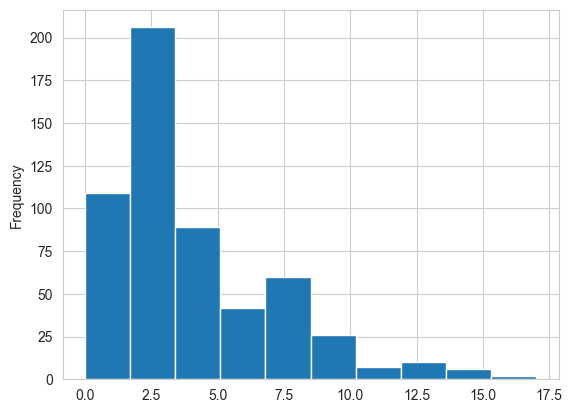

In [60]:
facilities["count"].plot.hist(bins = 10)

In [44]:
stations_distance = data.stations_distance
stations_distance["stationfrom"]= stations_distance["stationfrom"].str.lower()
stations_distance["stationto_n"] = stations_distance["stationto_n"].str.lower()
stations_distance.sort_values(by="length", ascending = False)


,stationfrom,stationto_i,stationto_n,length,geometry,total_length,count,length/count
835,ans,715,leuven,66.219913,"LINESTRING (4.71621 50.88137, 4.71618 50.88128...",75.584426,3,25.194809
832,leuven,31,ans,66.219913,"LINESTRING (4.71621 50.88137, 4.71618 50.88128...",98.911160,6,16.485193
552,brux-ouest,455,gent-st-p,53.737634,"LINESTRING (4.32282 50.85206, 4.32251 50.85146...",137.591647,7,19.655950
1025,gent-st-p,223,brux-ouest,53.737634,"LINESTRING (4.32282 50.85206, 4.32251 50.85146...",215.549418,9,23.949935
440,gent-st-p,415,forest-midi,52.603059,"LINESTRING (4.31035 50.81007, 4.30981 50.81062...",215.549418,9,23.949935
...,...,...,...,...,...,...,...,...
1324,jemeppe-s-s,515,ham-s-sambre,0.774603,"LINESTRING (4.67291 50.45281, 4.67257 50.45283...",10.701237,3,3.567079
860,geronstere,1097,spa,0.758586,"LINESTRING (5.85578 50.49024, 5.85599 50.49028...",0.758586,1,0.758586
201,spa,459,geronstere,0.758586,"LINESTRING (5.85578 50.49024, 5.85599 50.49028...",6.854911,2,3.427456
84,brux-schuman,218,bruxell-lux,0.676258,"LINESTRING (4.38002 50.84285, 4.37937 50.84263...",25.145466,6,4.190911


In [45]:
stations_distance["total_length"] = stations_distance.groupby("stationfrom")["length"].transform("sum")
stations_distance["count"] = stations_distance.groupby("stationfrom")["stationfrom"].transform("count")
# stations_distance = stations_distance.groupby("stationfrom").sum().reset_index()[["stationfrom", "length", "count"]].rename({"stationfrom": "station"}, axis=1)
stations_distance["length/count"] = stations_distance["total_length"] / stations_distance["count"]
stations_distance

,stationfrom,stationto_i,stationto_n,length,geometry,total_length,count,length/count
0,luttre,286,courc-motte,5.513544,"LINESTRING (4.38425 50.50601, 4.38444 50.50588...",11.716203,3,3.905401
1,thulin,501,hainin,1.567201,"LINESTRING (3.76679 50.42803, 3.76628 50.42791...",6.082822,2,3.041411
2,hasselt,19,alken,6.494286,"LINESTRING (5.29175 50.88640, 5.31405 50.89927...",37.297193,5,7.459439
3,mery,579,hony,1.477955,"LINESTRING (5.58707 50.54825, 5.58713 50.54815...",4.600313,2,2.300157
4,ezemaal,1146,tienen,6.307973,"LINESTRING (4.92564 50.80793, 4.93014 50.80467...",9.546610,2,4.773305
...,...,...,...,...,...,...,...,...
1375,forest-midi,455,gent-st-p,52.603059,"LINESTRING (4.31035 50.81007, 4.30981 50.81062...",139.499513,7,19.928502
1376,etterbeek,1761,delta,1.534245,"LINESTRING (4.40436 50.81920, 4.40371 50.81817...",8.203539,5,1.640708
1377,bissegem,649,kortrijk,3.494127,"LINESTRING (3.22409 50.82579, 3.23775 50.83018...",21.324587,3,7.108196
1378,engis,530,haute-flone,6.000201,"LINESTRING (5.40222 50.58266, 5.40111 50.58229...",10.076804,2,5.038402


In [46]:
stations_distance = stations_distance[["stationfrom", "total_length","count",  "length/count"]].drop_duplicates().rename(columns = {"stationfrom" : "station", "count" : "neighbours_count"})
stations_distance

,station,total_length,neighbours_count,length/count
0,luttre,11.716203,3,3.905401
1,thulin,6.082822,2,3.041411
2,hasselt,37.297193,5,7.459439
3,mery,4.600313,2,2.300157
4,ezemaal,9.546610,2,4.773305
...,...,...,...,...
1213,natoye,7.889648,2,3.944824
1226,de panne,3.669362,1,3.669362
1316,hamont,8.684387,1,8.684387
1317,oostende,21.897862,1,21.897862


The top 10 stations with the most neighbouring stations:

In [48]:
stations_distance[["station", "neighbours_count"]].sort_values(by = "neighbours_count", ascending = False).head(10)

,station,neighbours_count
272,schaerbeek,11
406,gent-st-p,9
430,melle,9
375,mechelen,9
336,bruxell-midi,9
316,halle,7
304,forest-midi,7
282,antw-berchem,7
298,diegem,7
294,liege-guill,7


<AxesSubplot: ylabel='Frequency'>

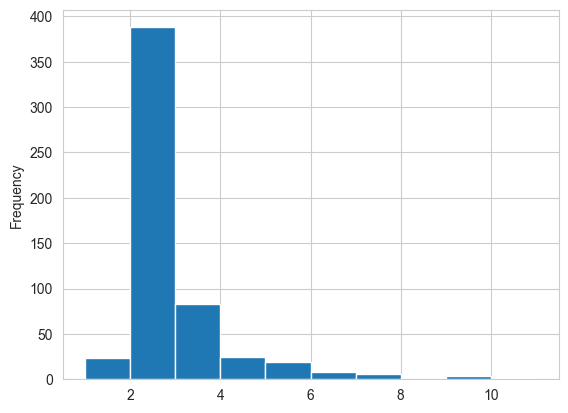

In [51]:
stations_distance["neighbours_count"].plot.hist()

The top 10 stations with the most total distance to neighbouring stations:

In [49]:
stations_distance[["station", "total_length"]].sort_values(by = "total_length", ascending = False).head(10)

,station,total_length
406,gent-st-p,215.549418
430,melle,182.045935
336,bruxell-midi,147.412160
304,forest-midi,139.499513
209,brux-ouest,137.591647
324,zwijndrecht,110.407316
375,mechelen,104.739717
270,melsele,104.735292
606,leuven,98.911160
194,welkenraedt,94.923633


<AxesSubplot: ylabel='Frequency'>

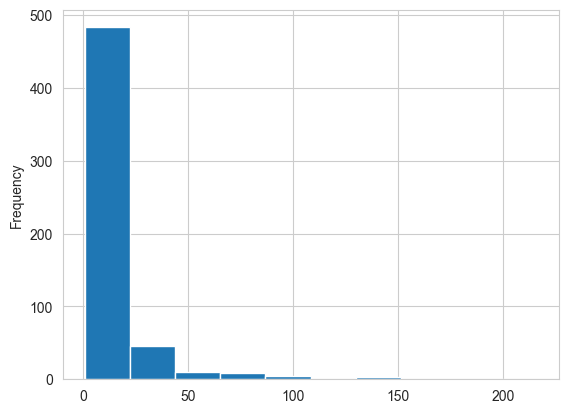

In [55]:
stations_distance["total_length"].plot.hist()

The top 10 stations with the most total distance to neighbouring stations, divided by the number of neighbouring stations (average length)

In [50]:
stations_distance[["station", "length/count"]].sort_values(by = "length/count", ascending = False).head(10)

,station,length/count
630,ans,25.194809
406,gent-st-p,23.949935
346,hergenrath,22.664595
460,florenville,22.534024
324,zwijndrecht,22.081463
1317,oostende,21.897862
627,vise,21.483349
644,tongeren,21.076508
972,noord'kempen,20.961412
270,melsele,20.947058


<AxesSubplot: ylabel='Frequency'>

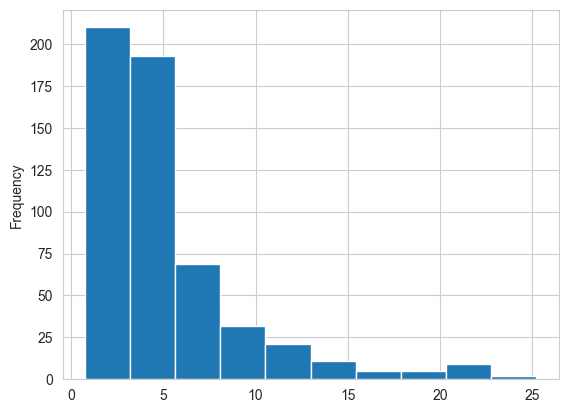

In [56]:
stations_distance["length/count"].plot.hist()